# Wine Classification Project

**Yang Liu**

In [1]:
#Import necessary modules for initial data importation and analysis
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import graphviz
%matplotlib inline  

In [2]:
#Load wine data into separate red and white wine dataframes
dataRed = pd.read_csv('winequality-red.csv', delimiter = ";")
dataWhite = pd.read_csv('winequality-white.csv', delimiter = ";")

print("Red wine dataset with {} entries and {} features.".format(*dataRed.shape))
print("White wine dataset with {} entries and {} features.".format(*dataWhite.shape))

Red wine dataset with 1599 entries and 12 features.
White wine dataset with 4898 entries and 12 features.


## Initial Data Characterization

In [3]:
#Describe data for red wines
display(dataRed.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
#Describe data for white wines
display(dataWhite.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


From preliminary observations, its clear that red and white wines have marked differences across the board on most features. Additionally, no red wines have a quality below 3 and above 8, and no white wines have a quality below 3 and above 9. 

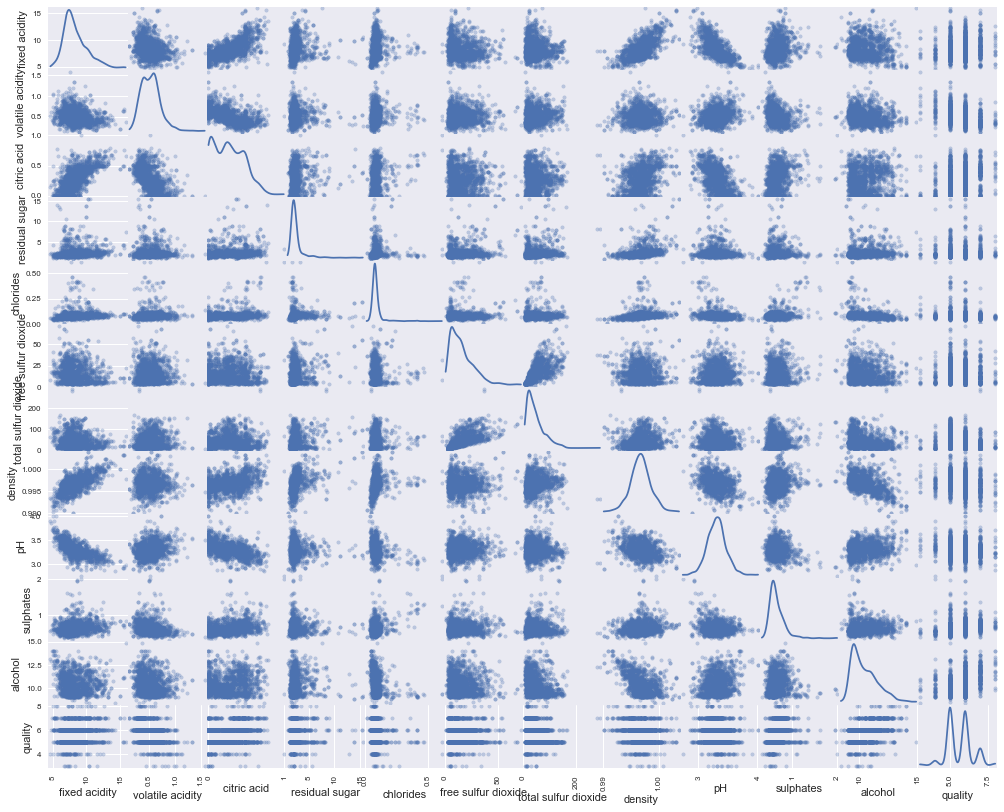

In [5]:
pd.scatter_matrix(dataRed, alpha = 0.3, figsize = (17,14), diagonal = 'kde');

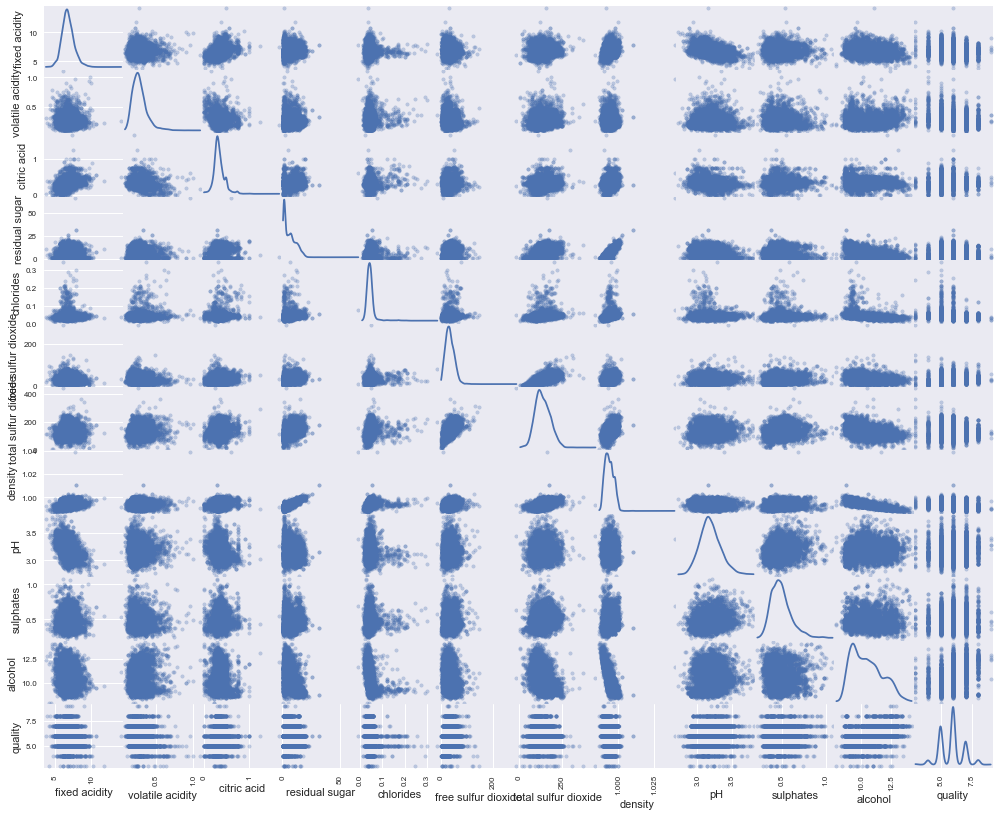

In [6]:
pd.scatter_matrix(dataWhite, alpha = 0.3, figsize = (17,14), diagonal = 'kde');

We can see from these visualizations that wine quality for red and white wine follow normal distributions (although it is not immediately clear due to the discrete values for quality). 

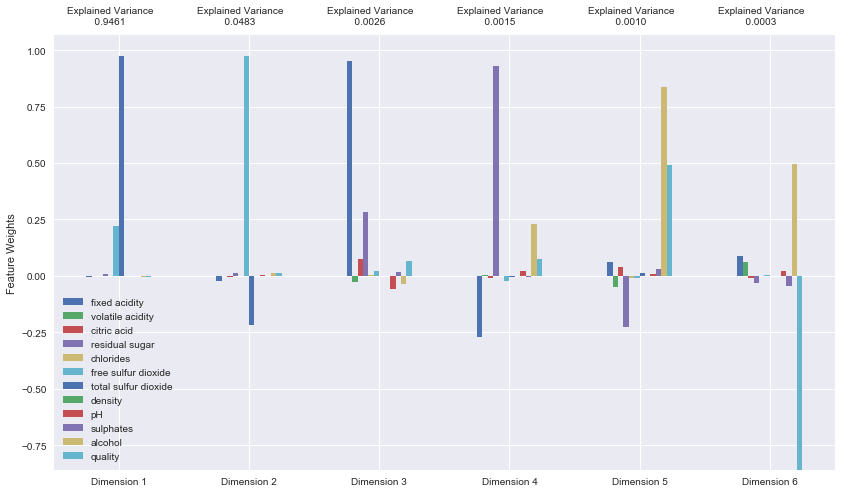

In [7]:
from sklearn.decomposition import PCA
import visuals as vs

pca = PCA(n_components=6)
pca.fit(dataRed)
#components = pd.DataFrame(pca.components_)
pca_results = vs.pca_results(dataRed, pca)
#plt.plot(pca.explained_variance_ratio_)
#pca_results.components_.plot.bar()
#components.plot.bar(figsize=(20,10))
#print(pca.explained_variance_ratio_)

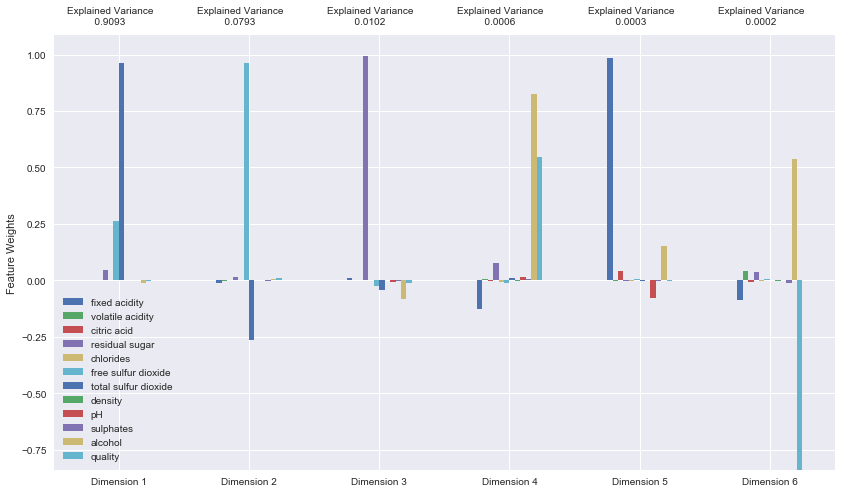

In [8]:
pcaWhite = PCA(n_components=6)
pcaWhite.fit(dataWhite)
pca_resultsW = vs.pca_results(dataWhite, pcaWhite)


## Wine Classification

In [50]:
#Import performance metrics for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score
#Import performance metrics for regression
from sklearn.metrics import mean_absolute_error, f1_score
#Import confustion matrix
from sklearn.metrics import confusion_matrix
#Plot confusion matrix (TAKEN FROM SKLEARN DOCUMENTATION)
from sklearn.model_selection import cross_val_score, cross_val_predict
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
#Split wine sets into features and labels
yRed, XRed = dataRed[['quality']], dataRed.drop(['quality'], axis=1)
yWhite, XWhite = dataWhite[['quality']], dataWhite.drop(['quality'], axis=1)

yRed = np.ravel(yRed)
yWhite = np.ravel(yWhite)

In [48]:
#Create testing and training sets
from sklearn.model_selection import train_test_split

TESTSIZE = 0.2
SEED = 47

XR_train, XR_test, yR_train, yR_test = train_test_split(XRed, yRed, test_size = TESTSIZE, random_state = SEED)
XW_train, XW_test, yW_train, yW_test = train_test_split(XWhite, yWhite, test_size = TESTSIZE, random_state = SEED)

In [49]:
print(len(yR_test))
print(len(yW_test))

#Baseline testing to check for baseline metrics
#quality = 4
print("####metrics for quality 4")
print("red")
red_dummy_4 = np.full(320, 4)
white_dummy_4 = np.full(980, 4)
print("accuracy:{}".format(accuracy_score(red_dummy_4, yR_test)))
print("f1:{}".format(f1_score(red_dummy_4, yR_test, average='macro')))
print("white")
print("accuracy:{}".format(accuracy_score(white_dummy_4, yW_test)))
print("f1:{}".format(f1_score(white_dummy_4, yW_test, average='macro'))) 
#quality = 5
print("####metrics for quality 5")
print("red")
red_dummy_5 = np.full(320, 5)
white_dummy_5 = np.full(980, 5)
print("accuracy:{}".format(accuracy_score(red_dummy_5, yR_test)))
print("f1:{}".format(f1_score(red_dummy_5, yR_test, average='macro')))
print("white")
print("accuracy:{}".format(accuracy_score(white_dummy_5, yW_test)))
print("f1:{}".format(f1_score(white_dummy_5, yW_test, average='macro'))) 
#quality = 6
print("####metrics for quality 6")
print("red")
red_dummy_6 = np.full(320, 6)
white_dummy_6 = np.full(980, 6)
print("accuracy:{}".format(accuracy_score(red_dummy_6, yR_test)))
print("f1:{}".format(f1_score(red_dummy_6, yR_test, average='macro')))
print("white")
print("accuracy:{}".format(accuracy_score(white_dummy_6, yW_test)))
print("f1:{}".format(f1_score(white_dummy_6, yW_test, average='macro'))) 
#quality = 7
print("####metrics for quality 7")
print("red")
red_dummy_7 = np.full(320, 7)
white_dummy_7 = np.full(980, 7)
print("accuracy:{}".format(accuracy_score(red_dummy_7, yR_test)))
print("f1:{}".format(f1_score(red_dummy_7, yR_test, average='macro')))
print("white")
print("accuracy:{}".format(accuracy_score(white_dummy_7, yW_test)))
print("f1:{}".format(f1_score(white_dummy_7, yW_test, average='macro'))) 


320
980
####metrics for quality 4
red
accuracy:0.05
f1:0.015873015873015872
white
accuracy:0.04183673469387755
f1:0.01338556970290565
####metrics for quality 5
red
accuracy:0.428125
f1:0.09992706053975199
white
accuracy:0.3081632653061224
f1:0.07852314092563702
####metrics for quality 6
red
accuracy:0.371875
f1:0.09035687167805619
white
accuracy:0.4316326530612245
f1:0.10049893086243765
####metrics for quality 7
red
accuracy:0.1375
f1:0.040293040293040296
white
accuracy:0.17448979591836736
f1:0.04952215464813206


C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Weak Classifiers

**Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

CLFSEED = 42

DTparams = {
    'criterion': 'gini', 
    'splitter': 'best', 
    'min_samples_split': 2, 
    'min_samples_leaf': 1, 
    'min_weight_fraction_leaf': 0.0, 
    'max_features': None, 
    'max_leaf_nodes': None, 
    'random_state': CLFSEED,
    #'min_impurity_decrease': 0.0, 
    #'min_impurity_split': None, 
    'class_weight': None, 
    'presort': False
}

def gridSearchDT(maxdepths, Xtrain, ytrain, Xtest, ytest):
    data = {'maxdepth': [], 'accuracy': [], 'f1': []}
    metrics = pd.DataFrame(data=data)
    best_tree = None
    max_accuracy = -np.inf
    maxf1 = -np.inf
    for maxdepth in maxdepths:
        clf = DecisionTreeClassifier(**DTparams, max_depth = maxdepth)
        clf.fit(Xtrain, ytrain)
        predstest = clf.predict(Xtest)
        accuracy = accuracy_score(ytest, predstest)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_tree = clf
        f1 = f1_score(ytest, predstest, average='macro', labels = np.unique(ytest))
        if f1 > maxf1:
            maxf1 = f1
        df = pd.DataFrame([[maxdepth, accuracy, f1]],\
                          columns=['maxdepth', 'accuracy', 'f1'])
        metrics = metrics.append(df, ignore_index=True)
    rt_val = {}
    rt_val['metrics'] = metrics
    rt_val['max_accuracy'] = max_accuracy
    rt_val['best_tree'] = best_tree
    rt_val['maxf1'] = maxf1
    return rt_val

C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.

0.521875
0.379628999011


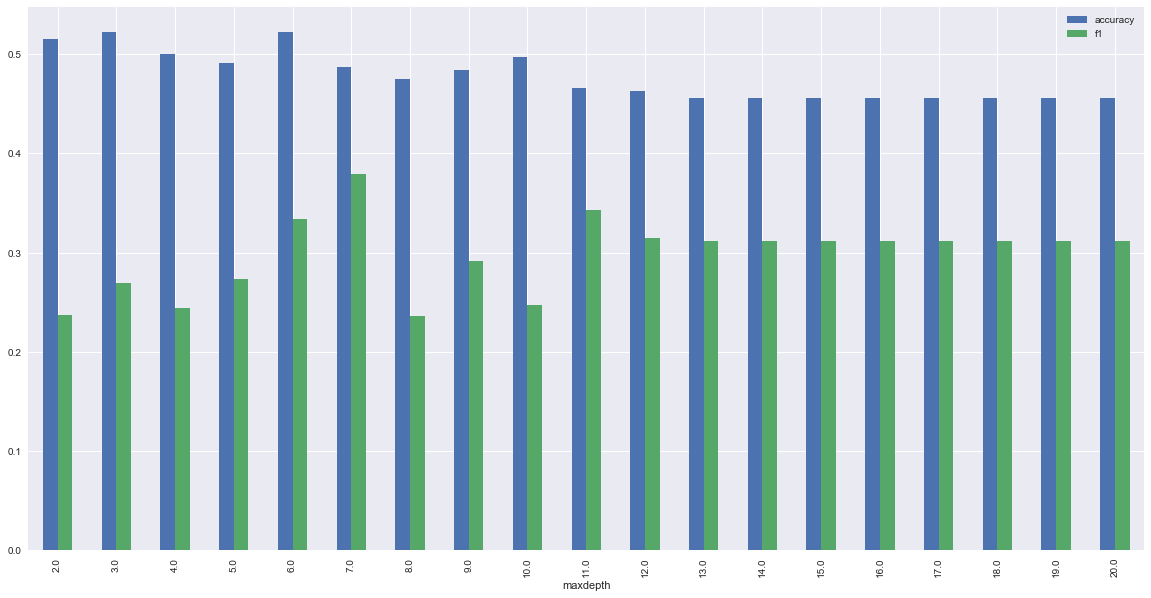

In [56]:
#Initialize max depth values to be tested
MAXDEPTHS = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

#Plot and compare max depth metrics
DTdepthvalues = gridSearchDT(MAXDEPTHS, XR_train, yR_train, XR_test, yR_test)
DTdepthvalues['metrics'].plot.bar(x = 'maxdepth', figsize=(20,10));
best_tree = tree.export_graphviz(DTdepthvalues['best_tree'], out_file=None) 
graph = graphviz.Source(best_tree)
print(DTdepthvalues['max_accuracy'])
print(DTdepthvalues['maxf1'])
#graph.render("Best Tree") 
DTaccR=DTdepthvalues['max_accuracy']
DTf1_scoreR=DTdepthvalues['maxf1']

C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.50306122449
0.302341179225


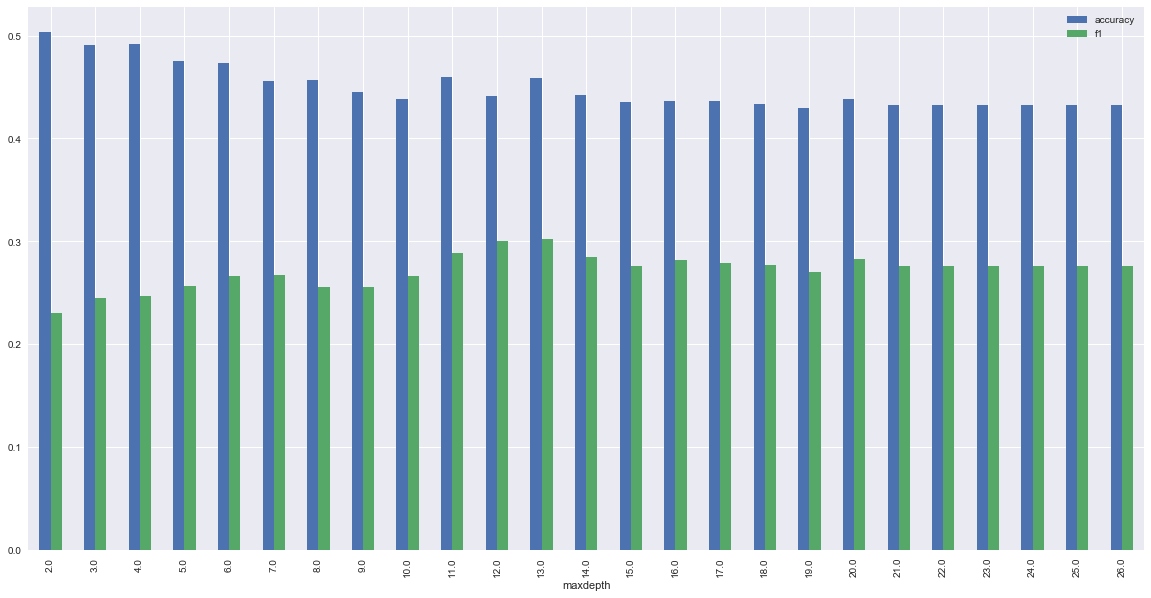

In [57]:
MAXDEPTHS = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
DTdepthvaluesWhite = gridSearchDT(MAXDEPTHS, XW_train, yW_train, XW_test, yW_test)
DTdepthvaluesWhite['metrics'].plot.bar(x = 'maxdepth', figsize=(20,10));
print(DTdepthvaluesWhite['max_accuracy'])
print(DTdepthvaluesWhite['maxf1'])
#graph.render("Best Tree") 
DTaccW=DTdepthvaluesWhite['max_accuracy']
DTf1_scoreW=DTdepthvaluesWhite['maxf1']

**Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

RFparams = {
    'n_estimators': 100,
    'criterion': 'gini', 
    'min_samples_split': 2, 
    'min_samples_leaf': 1, 
    'min_weight_fraction_leaf': 0.0, 
    'max_features': None, 
    'max_leaf_nodes': None, 
    'random_state': CLFSEED,
    #'min_impurity_decrease': 0.0, 
    #'min_impurity_split': None, 
    'class_weight': None, 
    'bootstrap': False
}

#Create a function to find best max depth
def gridSearchRandomForest(maxdepths, Xtrain, ytrain, Xtest, ytest):
    max_accuracy = -np.inf
    maxf1 = -np.inf
    data = {'maxdepth': [], 'accuracy': [], 'f1': []}
    metrics = pd.DataFrame(data=data)
    for maxdepth in maxdepths:
        clf = RandomForestClassifier(**RFparams, max_depth = maxdepth)
        clf.fit(Xtrain, ytrain)
        preds = clf.predict(Xtest)
        accuracy = accuracy_score(ytest, preds)
        f1 = f1_score(ytest, preds, average='macro', labels = np.unique(ytest))
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_tree = clf
        if f1 > maxf1:
            maxf1 = f1
        df = pd.DataFrame([[maxdepth, accuracy, f1]],\
                          columns=['maxdepth', 'accuracy', 'f1'])
        metrics = metrics.append(df, ignore_index=True)  
    rt_val = {}
    rt_val['metrics'] = metrics
    rt_val['max_accuracy'] = max_accuracy
    rt_val['best_tree'] = best_tree
    rt_val['maxf1'] = maxf1
    return rt_val

C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.65
0.414309179244


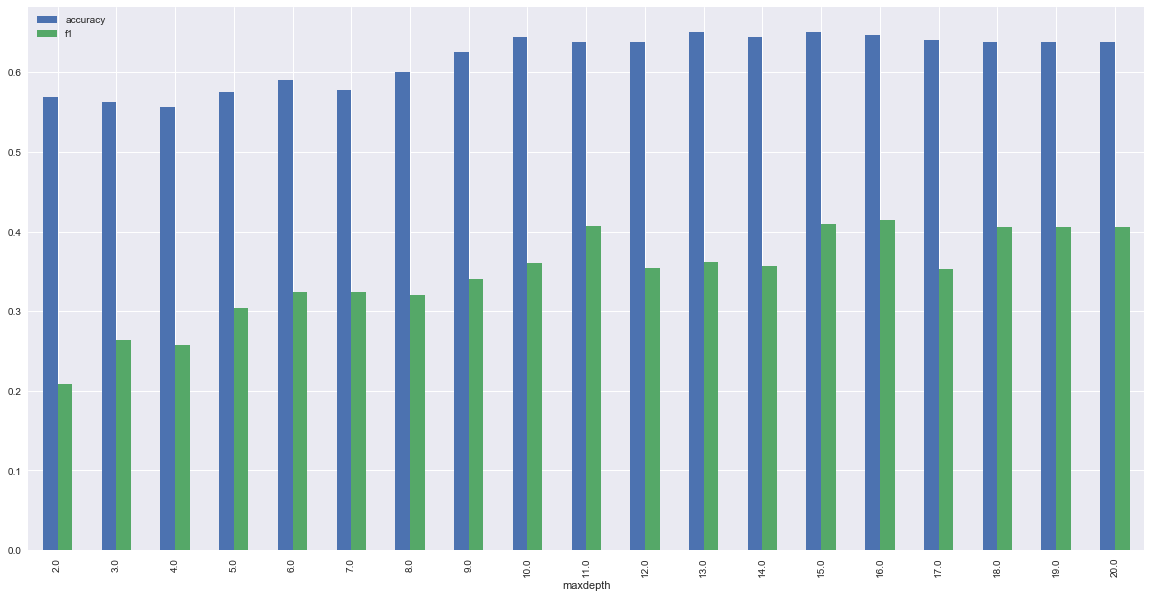

In [41]:
#Initialize max depth values to be tested
MAXDEPTHS = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

#Plot and compare max depth metrics
RFdepthvaluesRED = gridSearchRandomForest(MAXDEPTHS, XR_train, yR_train, XR_test, yR_test)
print(RFdepthvaluesRED['max_accuracy'])
print(RFdepthvaluesRED['maxf1'])
RFdepthvaluesRED['metrics'].plot.bar(x = 'maxdepth', figsize=(20,10));
RFaccR=RFdepthvaluesRED['max_accuracy']
RFf1_scoreR=RFdepthvaluesRED['maxf1']

C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.601020408163
0.436025585595


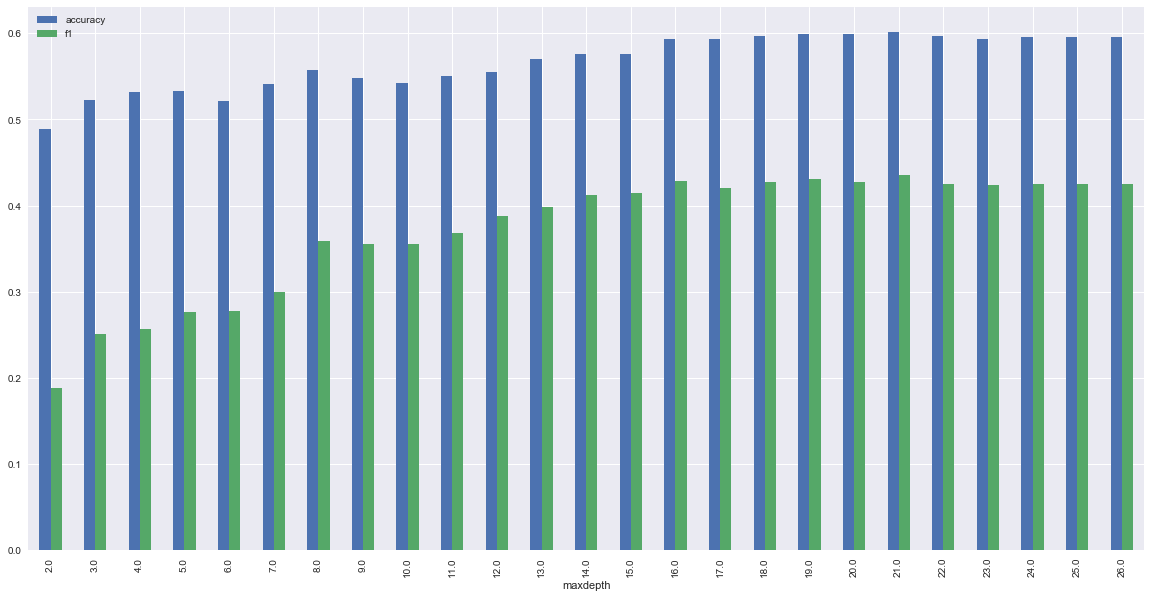

In [42]:
MAXDEPTHS = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]

RFdepthvaluesWHITE = gridSearchRandomForest(MAXDEPTHS, XW_train, yW_train, XW_test, yW_test)
RFaccW=RFdepthvaluesWHITE['max_accuracy']
RFf1_scoreW=RFdepthvaluesWHITE['maxf1']
print(RFdepthvaluesWHITE['max_accuracy'])
print(RFdepthvaluesWHITE['maxf1'])
RFdepthvaluesWHITE['metrics'].plot.bar(x = 'maxdepth', figsize=(20,10));


### Strong Classifiers

**Support Vector Classifier**

In [43]:
from sklearn.svm import SVC

Cvalues = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

SVCparams ={#'C':1, 
            'cache_size':4000, 
            'class_weight':None, 
            'coef0':0.0, 
            'decision_function_shape':'ovr', 
            'degree':1, 
            'gamma':'auto', 
            'kernel':'rbf',
            'max_iter':-1, 
            'probability':False, 
            'random_state':SEED, 
            'shrinking':True,
            'tol':0.001, 
            'verbose':False}

def gridSearchSVC(Cvalues, Xtrain, ytrain, Xtest, ytest):
    max_accuracy = -np.inf
    maxf1 = -np.inf
    data = {'C': [], 'accuracy': [], 'f1': []}
    metrics = pd.DataFrame(data=data)
    for Cvalue in Cvalues:
        clf = SVC(**SVCparams,C = Cvalue)
        clf.fit(Xtrain, ytrain)
        preds = clf.predict(Xtest)
        accuracy = accuracy_score(ytest, preds)
        f1 = f1_score(ytest, preds, average='macro', labels = np.unique(ytest))
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_tree = clf
        if f1 > maxf1:
            maxf1 = f1
        df = pd.DataFrame([[Cvalue, accuracy, f1]],\
                          columns=['C', 'accuracy', 'f1'])
        metrics = metrics.append(df, ignore_index=True)  
    rt_val = {}
    rt_val['metrics'] = metrics
    rt_val['max_accuracy'] = max_accuracy
    rt_val['best_tree'] = best_tree
    rt_val['maxf1'] = maxf1
    return rt_val

C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.621875
0.351162927085


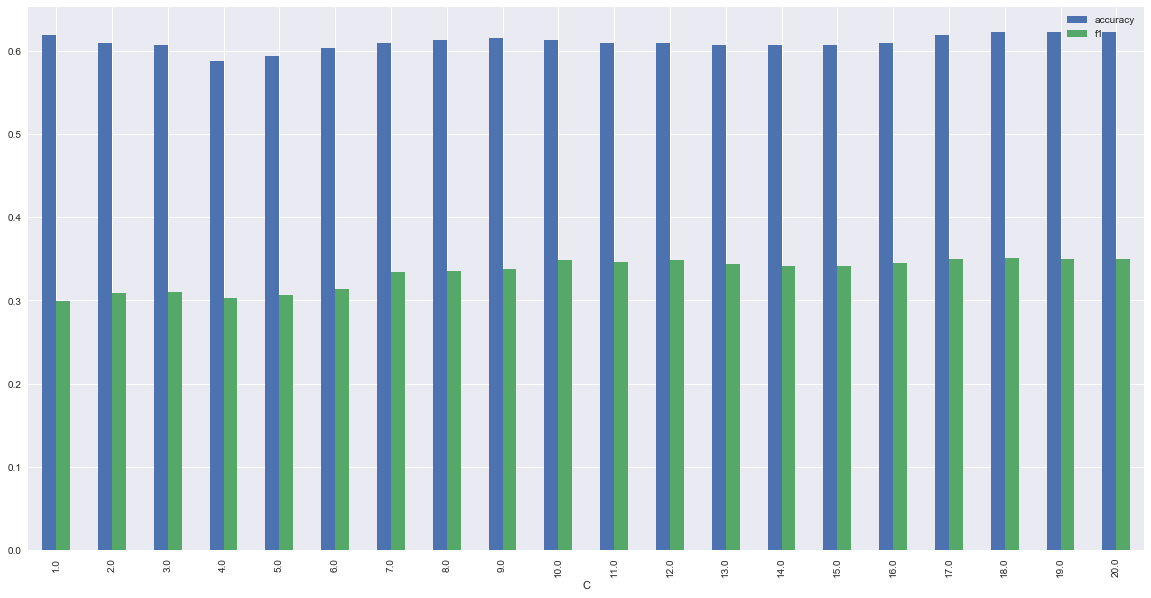

In [44]:
SVCCvaluesR = gridSearchSVC(Cvalues, XR_train, yR_train, XR_test, yR_test)
print(SVCCvaluesR['max_accuracy'])
print(SVCCvaluesR['maxf1'])
SVCaccR=SVCCvaluesR['max_accuracy']
SVCf1_scoreR=SVCCvaluesR['maxf1']
SVCCvaluesR['metrics'].plot.bar(x = 'C', figsize=(20,10));


C:\Users\Jian\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.582653061224
0.389870177388


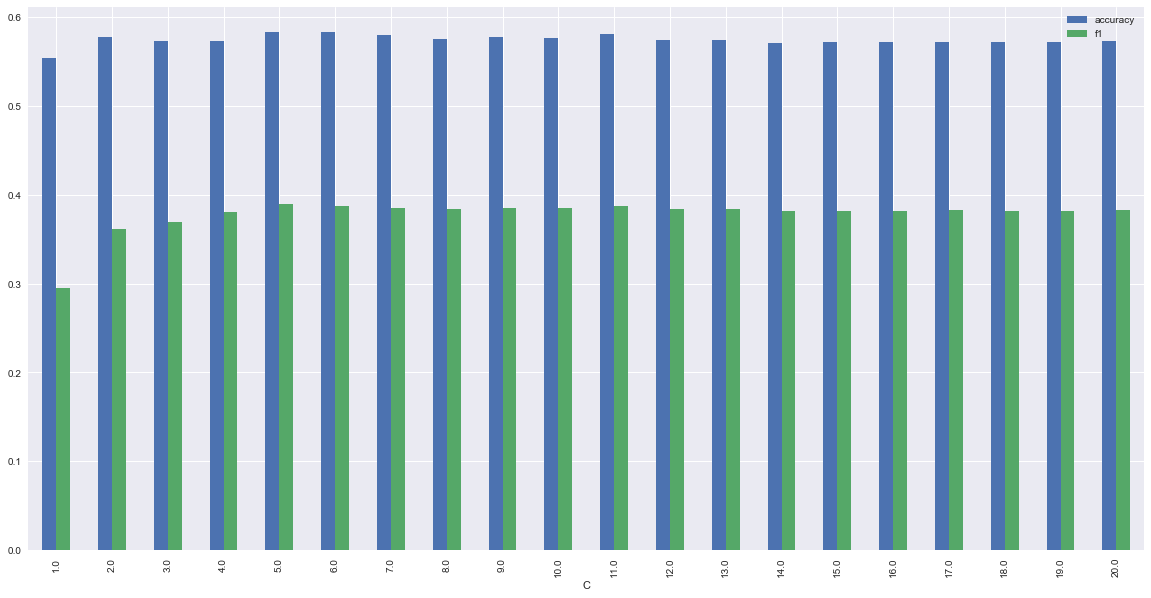

In [45]:
SVCCvaluesW = gridSearchSVC(Cvalues, XW_train, yW_train, XW_test, yW_test)
SVCaccW=SVCCvaluesW['max_accuracy']
SVCf1_scoreW=SVCCvaluesW['maxf1']
print(SVCCvaluesW['max_accuracy'])
print(SVCCvaluesW['maxf1'])
SVCCvaluesW['metrics'].plot.bar(x = 'C', figsize=(20,10));

**Neural Network**

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [23]:
one_hot_labels = keras.utils.to_categorical(yR_train, num_classes=11)

print(XR_train.shape)
#Define neural network model
modelRED = Sequential([
    Dense(4, input_shape=(11,)),
    Activation('relu'),
    #Dense(4),
    #Activation('relu'),
    Dense(11),
    Activation('softmax'),
])

#Model architecture summary
modelRED.summary()

(1279, 11)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 48        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                55        
_________________________________________________________________
activation_2 (Activation)    (None, 11)                0         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [24]:
EPOCHS = 200
BATCH_SIZE = 10

modelRED.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelRED.fit(XR_train, one_hot_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose = 0)

In [25]:
NNpreds_raw = modelRED.predict(XR_test)
NNpreds = np.argmax(NNpreds_raw, axis=1)
print(NNpreds)
NNaccuracy = accuracy_score(yR_test, NNpreds)
NNf1_score = f1_score(yR_test, NNpreds)

print(NNaccuracy)
print(NNf1_score)


[7 6 5 5 5 5 6 5 6 5 5 6 6 7 6 5 6 6 5 6 6 6 5 6 6 5 6 6 5 5 5 6 5 6 6 5 5
 6 5 6 6 5 7 5 6 5 5 6 5 6 5 6 5 7 5 5 6 6 5 6 7 5 7 6 6 5 7 5 5 5 6 5 5 6
 7 5 7 5 6 5 6 5 5 6 6 5 5 6 5 5 5 5 5 5 6 5 5 5 5 6 5 6 6 5 6 5 5 6 5 6 6
 5 5 5 6 6 6 6 5 6 5 5 6 5 7 6 5 6 6 7 6 6 6 5 5 6 5 5 5 6 5 6 5 6 5 5 5 5
 6 5 6 6 6 5 6 5 6 5 5 5 5 5 5 5 5 5 5 5 5 6 5 6 6 6 5 6 6 5 6 5 6 6 5 6 5
 5 5 7 5 6 7 6 6 6 5 5 6 7 6 5 6 5 6 5 5 5 5 6 5 7 6 6 7 5 6 5 6 6 6 6 5 5
 6 5 7 6 5 5 5 5 6 5 6 5 6 5 6 6 7 5 6 5 5 6 6 6 6 7 6 6 5 6 5 7 6 5 6 5 5
 5 6 6 6 5 5 5 5 5 6 6 6 6 6 5 5 5 5 5 5 5 7 5 6 5 6 5 5 5 6 5 5 6 5 5 6 6
 6 6 6 5 5 5 6 5 6 6 5 5 5 6 5 5 5 5 6 5 6 6 6 6]
0.60625
0.53125


In [26]:
one_hot_labels = keras.utils.to_categorical(yW_train, num_classes=11)

print(XW_train.shape)
#Define neural network model
modelWHITE = Sequential([
    Dense(4, input_shape=(11,)),
    Activation('relu'),
    #Dense(4),
    #Activation('relu'),
    Dense(11),
    Activation('softmax'),
])

#Model architecture summary
modelWHITE.summary()

(3918, 11)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 48        
_________________________________________________________________
activation_3 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 11)                55        
_________________________________________________________________
activation_4 (Activation)    (None, 11)                0         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [27]:
modelWHITE.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelWHITE.fit(XW_train, one_hot_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose = 0)

In [28]:
NNpreds_raw = modelWHITE.predict(XW_test)
NNpreds = np.argmax(NNpreds_raw, axis=1)
print(NNpreds)
NNaccuracy = accuracy_score(yW_test, NNpreds)
NNf1_score = f1_score(yW_test, NNpreds)

print(NNaccuracy)
print(NNf1_score)

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 

**Gradient Boosted**

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

GBCparams ={'loss': 'deviance', 
            'learning_rate': 0.2, 
            'n_estimators':100, 
            'max_depth': 5 }


clf_GBC = GradientBoostingClassifier(**GBCparams, random_state = SEED)
clf_GBC.fit(XR_train, yR_train)
preds_train_GBC = clf_GBC.predict(XR_train)
preds_test_GBC = clf_GBC.predict(XR_test)
GBCaccR=accuracy_score(preds_test_GBC, yR_test)
GBCf1_scoreR=f1_score(preds_test_GBC, yR_test)
print("training accuracy: {}".format(accuracy_score(preds_train_GBC, yR_train)))
print("testing accuracy: {}".format(accuracy_score(preds_test_GBC, yR_test)))
print("testing f1_score: {}".format(f1_score(preds_test_GBC, yR_test)))

training accuracy: 1.0
testing accuracy: 0.703125
testing mse: 0.434375


In [162]:
clf_GBC = GradientBoostingClassifier(**GBCparams, random_state = SEED)
clf_GBC.fit(XW_train, yW_train)
preds_train_GBC = clf_GBC.predict(XW_train)
preds_test_GBC = clf_GBC.predict(XW_test)
GBCaccW=accuracy_score(preds_test_GBC, yW_test)
GBCf1_scoreW=f1_score(preds_test_GBC, yW_test)
print("training accuracy: {}".format(accuracy_score(preds_train_GBC, yW_train)))
print("testing accuracy: {}".format(accuracy_score(preds_test_GBC, yW_test)))
print("testing f1_score: {}".format(f1_score(preds_test_GBC, yW_test)))

training accuracy: 0.9938744257274119
testing accuracy: 0.6602040816326531
testing mse: 0.4887755102040816


**XGBoost**

In [97]:
import xgboost as xgb

train_data_red = xgb.DMatrix(XR_train, label = yR_train)
train_data_white = xgb.DMatrix(XW_train, label = yW_train)

#Setting paramaters for xgb tree classifier
xgb_params = {}
xgb_params['learning_rate'] = 0.3
xgb_params['booster'] = 'gbtree'
xgb_params['objective'] = 'multi:softmax'
xgb_params['num_class'] = 11
xgb_params['tree_method'] = 'exact'
xgb_params['num_leaves'] = 10
xgb_params['min_data'] = 50
xgb_params['max_depth'] = 7#5
xgb_params['seed'] = SEED

num_round = 100

test_data_red = xgb.DMatrix(XR_test)
test_data_white = xgb.DMatrix(XW_test)

xgb_bst_red = xgb.train(xgb_params, train_data_red, num_round)
xgb_bst_white = xgb.train(xgb_params, train_data_white, num_round)

predR_test_xgb = xgb_bst_red.predict(test_data_red)
predW_test_xgb = xgb_bst_white.predict(test_data_white)

In [98]:
#print("Red wine training accuracy: {}".format(accuracy_score(predR_train_xgb, yR_test)))
XGBaccR=accuracy_score(predR_test_xgb, yR_test)
XGBf1_scoreR=f1_score(predR_test_xgb, yR_test)
print("Red wine test accuracy: {}".format(accuracy_score(predR_test_xgb, yR_test)))
print("Red wine f1_score: {}".format(f1_score(predR_test_xgb, yR_test)))

XGBaccW=accuracy_score(predW_test_xgb, yW_test)
XGBf1_scoreW=f1_score(predW_test_xgb, yW_test)
#print("White wine training accuracy: {}".format(accuracy_score(predW_train_xgb, yW_test)))
print("White wine test accuracy: {}".format(accuracy_score(predW_test_xgb, yW_test)))
print("White wine f1_score: {}".format(f1_score(predW_test_xgb, yW_test)))

Red wine test accuracy: 0.70625
Red wine mse: 0.45
White wine test accuracy: 0.6775510204081633
White wine mse: 0.4530612244897959


Confusion matrix, without normalization
[[  0   0   0   0   0   0]
 [  0   0   1   0   0   0]
 [  2   9 114  24   4   0]
 [  1   7  21  85  15   0]
 [  0   0   1  10  25   1]
 [  0   0   0   0   0   0]]
Confusion matrix, without normalization
[[  0   0   0   0   0   0   0]
 [  1   5   4   0   0   0   0]
 [  5  23 203  72   8   0   0]
 [  0  13  83 310  78  10   0]
 [  0   0  12  41  85  17   0]
 [  0   0   0   0   0  10   0]
 [  0   0   0   0   0   0   0]]


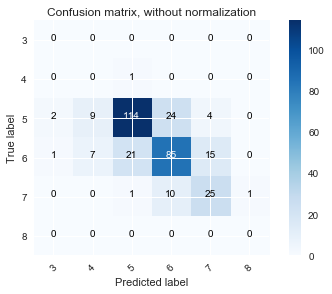

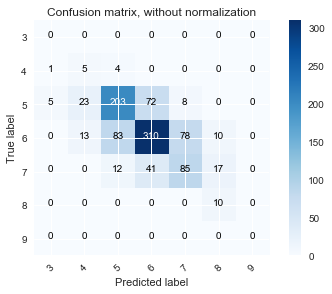

In [52]:
red_class_labels = [3,4,5,6,7,8]
white_class_labels = [3,4,5,6,7,8,9]

cm_red_xgb = confusion_matrix(predR_test_xgb, yR_test, labels = red_class_labels)
cm_white_xgb = confusion_matrix(predW_test_xgb, yW_test, labels = white_class_labels)

plt.figure()
plot_confusion_matrix(cm_red_xgb, classes=red_class_labels,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cm_white_xgb, classes=white_class_labels,
                      title='Confusion matrix, without normalization')


In [ ]:
xgb.plot_importance(xgb_bst_red)
xgb.plot_importance(xgb_bst_white)

**LightGBM**

In [123]:
import lightgbm as lgb
from lightgbm import LGBMModel

train_data_red = lgb.Dataset(XR_train, label=yR_train)
train_data_white = lgb.Dataset(XW_train, label=yW_train)

#Setting paramaters for lgb tree classifier
lgb_params = {}
lgb_params['learning_rate'] = 0.3
lgb_params['boosting_type'] = 'gbdt'
lgb_params['objective'] = 'multiclass'
lgb_params['num_class'] = 11
lgb_params['metric'] = 'multi_logloss'
lgb_params['num_leaves'] = 10
lgb_params['min_data'] = 50
lgb_params['max_depth'] = 5
num_round = 1000
lgb_bst_red = lgb.train(lgb_params, train_data_red, num_round)
lgb_bst_white = lgb.train(lgb_params, train_data_white, num_round)

#bst_white = lgb.train(params, train_data_white, num_round)


def convertProbto1D(preds):
    converted_preds = []
    for i in range(preds.shape[0]): 
        max_index = preds[i].tolist().index(max(preds[i]))
        converted_preds.append(max_index)
    return converted_preds

predR_test_lgb = lgb_bst_red.predict(XR_test)
predW_test_lgb = lgb_bst_white.predict(XW_test)

RedPredictions = convertProbto1D(predR_test_lgb)
WhitePredictions = convertProbto1D(predW_test_lgb)

In [124]:
#Print prediction accuracies for wine data
LGBaccR=accuracy_score(RedPredictions, yR_test)
LGBf1_scoreR=f1_score(RedPredictions, yR_test)
print("Red wine accuracy: {}".format(accuracy_score(RedPredictions, yR_test)))
print("Red wine f1_score: {}".format(f1_score(RedPredictions, yR_test)))

LGBaccW=accuracy_score(WhitePredictions, yW_test)
LGBf1_scoreW=f1_score(WhitePredictions, yW_test)
print("White wine accuracy: {}".format(accuracy_score(WhitePredictions, yW_test)))
print("White wine f1_score: {}".format(f1_score(WhitePredictions, yW_test)))


Red wine accuracy: 0.6875
Red wine mse: 0.44375
White wine accuracy: 0.6581632653061225
White wine mse: 0.5020408163265306


In [152]:
MetricsRed = pd.DataFrame([['Decision Tree', DTaccR, DTf1_scoreR],['Random Forest', RFaccR, RFf1_scoreR],['SVC', SVCaccR, SVCf1_scoreR], ['GBC', GBCaccR, GBCf1_scoreR], ['XGB', XGBaccR, XGBf1_scoreR], ['LightGBM', LGBaccR,LGBf1_scoreR]],columns=['classifier', 'accuracy', 'f1_score'])
MetricsWhite = pd.DataFrame([['Decision Tree', DTaccW, DTf1_scoreW],['Random Forest', RFaccW, RFf1_scoreW],['SVC', SVCaccW, SVCf1_scoreW], ['GBC', GBCaccW, GBCf1_scoreW], ['XGB', XGBaccW, XGBf1_scoreW], ['LightGBM', LGBaccW,LGBf1_scoreW]],columns=['classifier', 'accuracy', 'f1_score'])

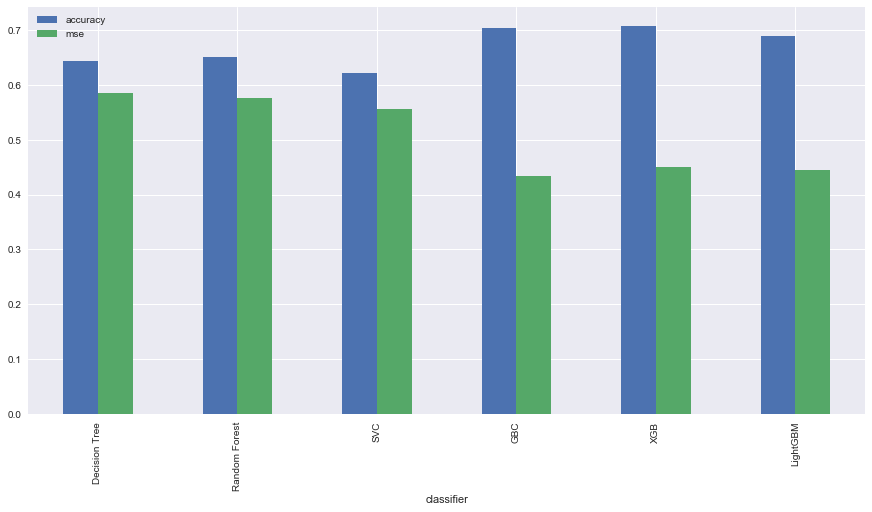

In [153]:
MetricsRed.plot.bar(x = 'classifier', figsize=(15,7.5))

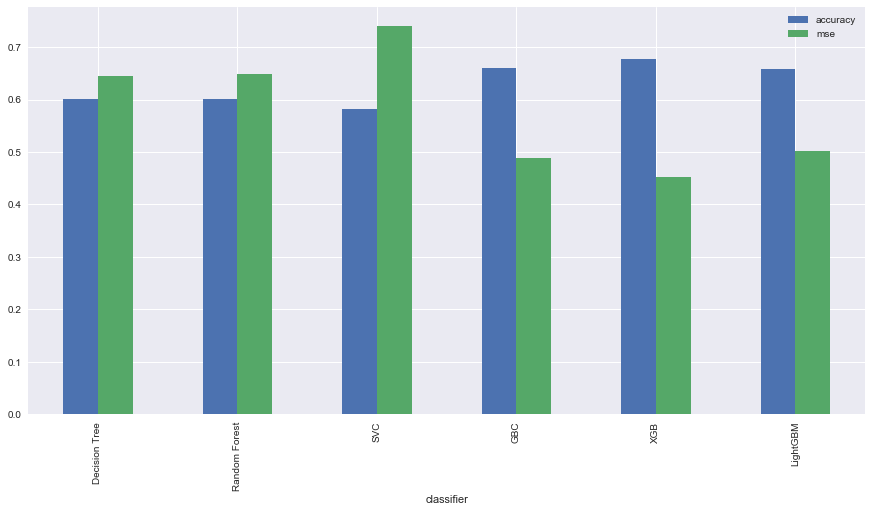

In [154]:
MetricsWhite.plot.bar(x = 'classifier', figsize=(15,7.5))